#26 Sentimental Analysis NLP

In [1]:
!pip install nltk

### Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sn

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


### Load Dataset from Local Directory

In [ ]:
from google.colab import files
uploaded = files.upload()

### Importing Dataset

In [31]:
dataset = pd.read_csv('Sentiment_Dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

###Segregating Dataset into Input & Output

In [32]:
features = dataset.iloc[:, 10].values
labels = dataset.iloc[:, 1].values

###Removing the Special Character

In [33]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Replaces multiple spaces with a single space.
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b' it may stored as byte
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)   

###Feature Extraction from text


In [34]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(processed_features)
len(processed_features)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


14640

###Splitting Dataset into Train & Test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

###Loading Random Forest Algorithm

In [21]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


###Predicting the Test data with Trained Model

In [36]:
predictions = text_classifier.predict(X_test)

###Score of the Model

In [37]:
print(accuracy_score(y_test, predictions))

0.7592213114754098


###Confusion Matrix

In [39]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[1722  108   40]
 [ 327  247   40]
 [ 132   58  254]]


##Prediction

In [40]:
# Sample new input for testing
new_input = ["@VirginAmerica SFO-PDX schedule is still MIA."]
new_input_vectorized = vectorizer.transform(new_input).toarray()

new_prediction = text_classifier.predict(new_input_vectorized)

print(f"Predicted class: {new_prediction[0]}")

Predicted class: negative


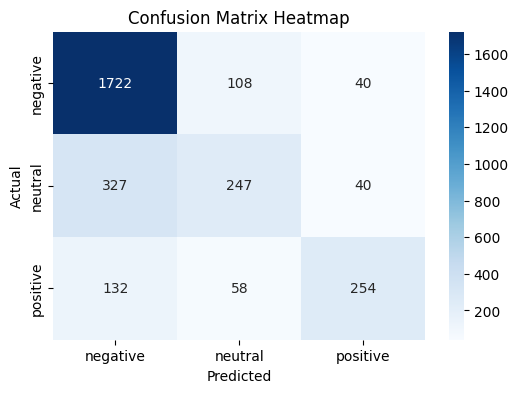

In [41]:
plt.figure(figsize=(6,4))
#annot - showing values in grid, fmt - format(decimal integer)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(labels), 
            yticklabels=np.unique(labels))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
